<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(0_8)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.8_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.001213,39.786313,32.471043,1.774779,125.033348,123.718327,1.315021
1,0.0,1.0,36.173569,39.505096,65.642118,3.459976,154.780758,151.800214,2.980544
2,0.0,2.0,72.922526,81.218589,60.037261,-8.810394,215.367981,223.993002,-8.625021
3,0.0,3.0,77.075675,77.580317,92.918399,-7.145393,250.428997,257.167109,-6.738111
4,0.0,4.0,28.741757,58.220659,30.905493,-0.858858,127.009050,128.740872,-1.731822
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,26.193313,64.536879,52.461618,-1.260982,151.930828,152.413475,-0.482647
249996,999.0,246.0,76.063044,24.814174,28.596930,5.687287,145.161436,138.343135,6.818301
249997,999.0,247.0,28.234526,48.871646,48.189443,2.901836,138.197451,134.542515,3.654937
249998,999.0,248.0,74.272499,80.722513,93.433665,5.297586,263.726265,257.819021,5.907244


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    41.001213  39.786313  32.471043  1.774779  125.033348   
      1.0    36.173569  39.505096  65.642118  3.459976  154.780758   
      2.0    72.922526  81.218589  60.037261 -8.810394  215.367981   
      3.0    77.075675  77.580317  92.918399 -7.145393  250.428997   
      4.0    28.741757  58.220659  30.905493 -0.858858  127.009050   
...                ...        ...        ...       ...         ...   
999.0 245.0  26.193313  64.536879  52.461618 -1.260982  151.930828   
      246.0  76.063044  24.814174  28.596930  5.687287  145.161436   
      247.0  28.234526  48.871646  48.189443  2.901836  138.197451   
      248.0  74.272499  80.722513  93.433665  5.297586  263.726265   
      249.0  37.096434  22.356278  31.881752  4.550160  105.884624   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    123.718327  1.315021  
      1.0    151.800214  2.980544  
      2.0    223.993002 -8.625021  
      3.0    257.167109 -6.738111  
      4.0    128.740872 -1.731822  
...                 ...       ...  
999.0 245.0  152.413475 -0.482647  
      246.0  138.343135  6.818301  
      247.0  134.542515  3.654937  
      248.0  257.819021  5.907244  
      249.0  100.476588  5.408037  

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    41.001213  39.786313  32.471043  1.774779  125.033348   
      1.0    36.173569  39.505096  65.642118  3.459976  154.780758   
      2.0    72.922526  81.218589  60.037261 -8.810394  215.367981   
      3.0    77.075675  77.580317  92.918399 -7.145393  250.428997   
      4.0    28.741757  58.220659  30.905493 -0.858858  127.009050   
...                ...        ...        ...       ...         ...   
999.0 245.0  26.193313  64.536879  52.461618 -1.260982  151.930828   
      246.0  76.063044  24.814174  28.596930  5.687287  145.161436   
      247.0  28.234526  48.871646  48.189443  2.901836  138.197451   
      248.0  74.272499  80.722513  93.433665  5.297586  263.726265   
      249.0  37.096434  22.356278  31.881752  4.550160  105.884624   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    123.718327  1.315021  
      1.0    151.800214  2.980544  
      2.0    223.993002 -8.625021  
      3.0    257.167109 -6.738111  
      4.0    128.740872 -1.731822  
...                 ...       ...  
999.0 245.0  152.413475 -0.482647  
      246.0  138.343135  6.818301  
      247.0  134.542515  3.654937  
      248.0  257.819021  5.907244  
      249.0  100.476588  5.408037  

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.001213,39.786313,32.471043,1.774779,125.033348,123.718327,1.315021
1,0.0,1.0,36.173569,39.505096,65.642118,3.459976,154.780758,151.800214,2.980544
2,0.0,2.0,72.922526,81.218589,60.037261,-8.810394,215.367981,223.993002,-8.625021
3,0.0,3.0,77.075675,77.580317,92.918399,-7.145393,250.428997,257.167109,-6.738111
4,0.0,4.0,28.741757,58.220659,30.905493,-0.858858,127.009050,128.740872,-1.731822
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,26.193313,64.536879,52.461618,-1.260982,151.930828,152.413475,-0.482647
249996,999.0,246.0,76.063044,24.814174,28.596930,5.687287,145.161436,138.343135,6.818301
249997,999.0,247.0,28.234526,48.871646,48.189443,2.901836,138.197451,134.542515,3.654937
249998,999.0,248.0,74.272499,80.722513,93.433665,5.297586,263.726265,257.819021,5.907244


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    41.001213  39.786313  32.471043  1.774779  125.033348   
      1.0    36.173569  39.505096  65.642118  3.459976  154.780758   
      2.0    72.922526  81.218589  60.037261 -8.810394  215.367981   
      3.0    77.075675  77.580317  92.918399 -7.145393  250.428997   
      4.0    28.741757  58.220659  30.905493 -0.858858  127.009050   
...                ...        ...        ...       ...         ...   
999.0 245.0  26.193313  64.536879  52.461618 -1.260982  151.930828   
      246.0  76.063044  24.814174  28.596930  5.687287  145.161436   
      247.0  28.234526  48.871646  48.189443  2.901836  138.197451   
      248.0  74.272499  80.722513  93.433665  5.297586  263.726265   
      249.0  37.096434  22.356278  31.881752  4.550160  105.884624   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    123.718327  1.315021  
      1.0    151.800214  2.980544  
      2.0    223.993002 -8.625021  
      3.0    257.167109 -6.738111  
      4.0    128.740872 -1.731822  
...                 ...       ...  
999.0 245.0  152.413475 -0.482647  
      246.0  138.343135  6.818301  
      247.0  134.542515  3.654937  
      248.0  257.819021  5.907244  
      249.0  100.476588  5.408037  

[250000 rows x 7 columns]

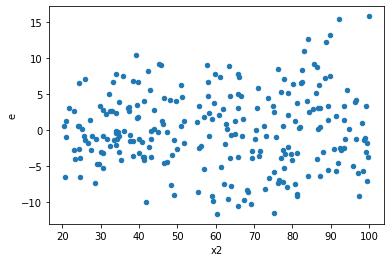

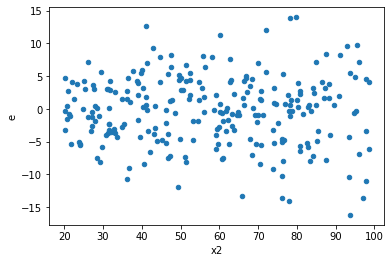

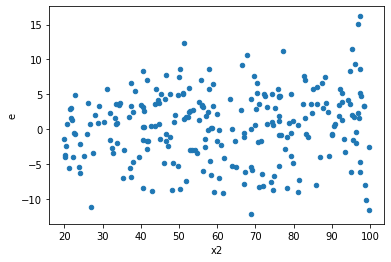

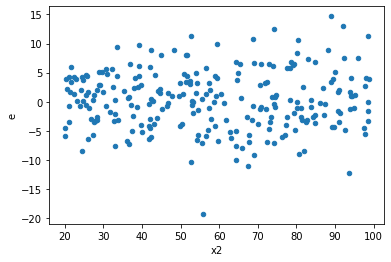

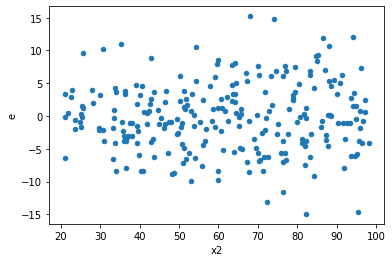

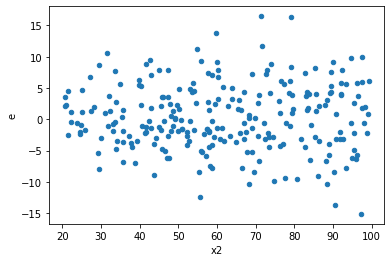

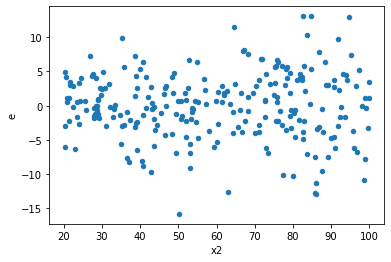

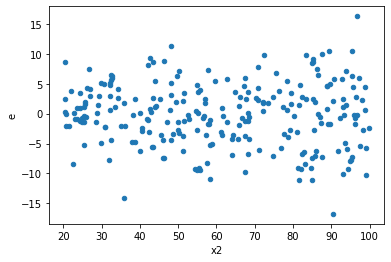

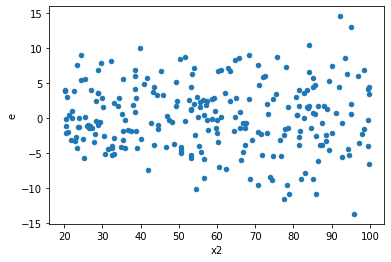

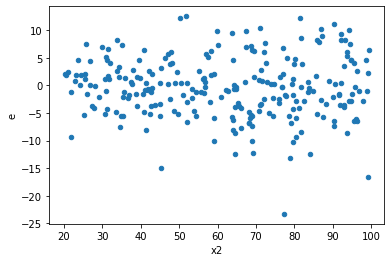

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,124.0,120.0,2505.285747319189,4168.803135844057,20.203917317090234,34.740026132033805,1.7194698229460514,0.003040591431498818,0.9984797042842506,0.001520295715749409,Reject005=0 : Heteroscedasticity
1.0,122.0,122.0,2909.0713511526487,3815.608779925044,23.84484714059548,31.275481802664295,1.3116243362037863,0.13549670565752092,0.9322516471712395,0.06774835282876046,Reject005=1 : Homoscedasticity
5.0,127.0,117.0,3127.5142347822334,3726.9416566884815,24.62609633686798,31.854202193918645,1.2935140737766624,0.15844047758439017,0.9207797612078049,0.07922023879219509,Reject005=1 : Homoscedasticity
6.0,128.0,116.0,2364.8275888448497,3178.578011246083,18.47521553785039,27.40153457970761,1.483151009717303,0.031320712795775085,0.9843396436021125,0.015660356397887543,Reject005=0 : Heteroscedasticity
7.0,120.0,124.0,2836.307321307983,3984.232901881656,23.63589434423319,32.13091049904561,1.359411665625637,0.0908076738360386,0.9545961630819807,0.0454038369180193,Reject005=1 : Homoscedasticity
9.0,117.0,127.0,3288.270348680706,4008.006281544953,28.104874775048767,31.559104579094118,1.1229050060422963,0.5214307193697427,0.7392846403151286,0.26071535968487136,Reject005=1 : Homoscedasticity
14.0,128.0,116.0,2383.3089838202586,3299.416974696707,18.61960143609577,28.44324978186816,1.5275971335631473,0.020734152929456906,0.9896329235352715,0.010367076464728453,Reject005=0 : Heteroscedasticity
17.0,116.0,128.0,2594.911123404972,3217.397386985289,22.36992347762907,25.13591708582257,1.123647879750667,0.5188318804435921,0.740584059778204,0.25941594022179604,Reject005=1 : Homoscedasticity
18.0,142.0,102.0,2714.7180156678587,2261.1708687182063,19.11773250470323,22.168341850178493,1.1595696218013705,0.42879205378465435,0.7856039731076728,0.21439602689232717,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,124.0,120.0,2505.285747319189,4168.803135844057,20.203917317090234,34.740026132033805,1.7194698229460514,0.003040591431498818,Reject005=0 : Heteroscedasticity
1.0,122.0,122.0,2909.0713511526487,3815.608779925044,23.84484714059548,31.275481802664295,1.3116243362037863,0.13549670565752092,Reject005=1 : Homoscedasticity
2.0,120.0,124.0,3683.646840561811,2530.10440458865,30.69705700468176,20.40406777894073,0.6646913342809639,0.025121762763637093,Reject005=0 : Heteroscedasticity
3.0,132.0,112.0,4085.7802082037774,2054.0243903407963,30.952880365180132,18.33950348518568,0.5924974758024899,0.00392439027042871,Reject005=0 : Heteroscedasticity
4.0,137.0,107.0,4218.368260482587,2431.2212775730127,30.791009200602826,22.72169418292535,0.7379327528660706,0.0935655268408486,Reject005=1 : Homoscedasticity
5.0,127.0,117.0,3127.5142347822334,3726.9416566884815,24.62609633686798,31.854202193918645,1.2935140737766624,0.15844047758439017,Reject005=1 : Homoscedasticity
6.0,128.0,116.0,2364.8275888448497,3178.578011246083,18.47521553785039,27.40153457970761,1.483151009717303,0.031320712795775085,Reject005=0 : Heteroscedasticity
7.0,120.0,124.0,2836.307321307983,3984.232901881656,23.63589434423319,32.13091049904561,1.359411665625637,0.0908076738360386,Reject005=1 : Homoscedasticity
8.0,143.0,101.0,3719.7667715535263,1793.3519038494633,26.012355045828855,17.755959444054092,0.6825971509604357,0.03570717648541544,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      626
Reject005=0 : Heteroscedasticity    374
Name: Result_test, dtype: int64